## I percentili potrebbero essere non veritieri data la media cosiderata nelle tracce

In [1]:
import pandas

In [2]:
from pyspark.sql import functions as f

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
spark

In [5]:
traces =(spark.read
              .option('mergeSchema', 'true')
              .parquet('data/*.parquet'))

In [6]:
def filterSelfDurations(cols):
    return list(filter(lambda c:c.endswith('avg_self_dur'), traces.columns))

In [7]:
def filterFullDurations(cols):
    return list(filter(lambda c:c.endswith('avg_dur'), traces.columns))

In [8]:
pandasDf= (traces.select(filterFullDurations(traces.columns))
                        .toPandas())

In [9]:
quantiles = {}
for c in pandasDf.columns:
    quantiles[c] = [pandasDf[c].quantile(i/1000) for i in range(1000)]

In [10]:
frontendName = 'web-service_HomeControllerHome_avg_dur'

In [11]:
backendNames = [ e for e in quantiles if e != frontendName]

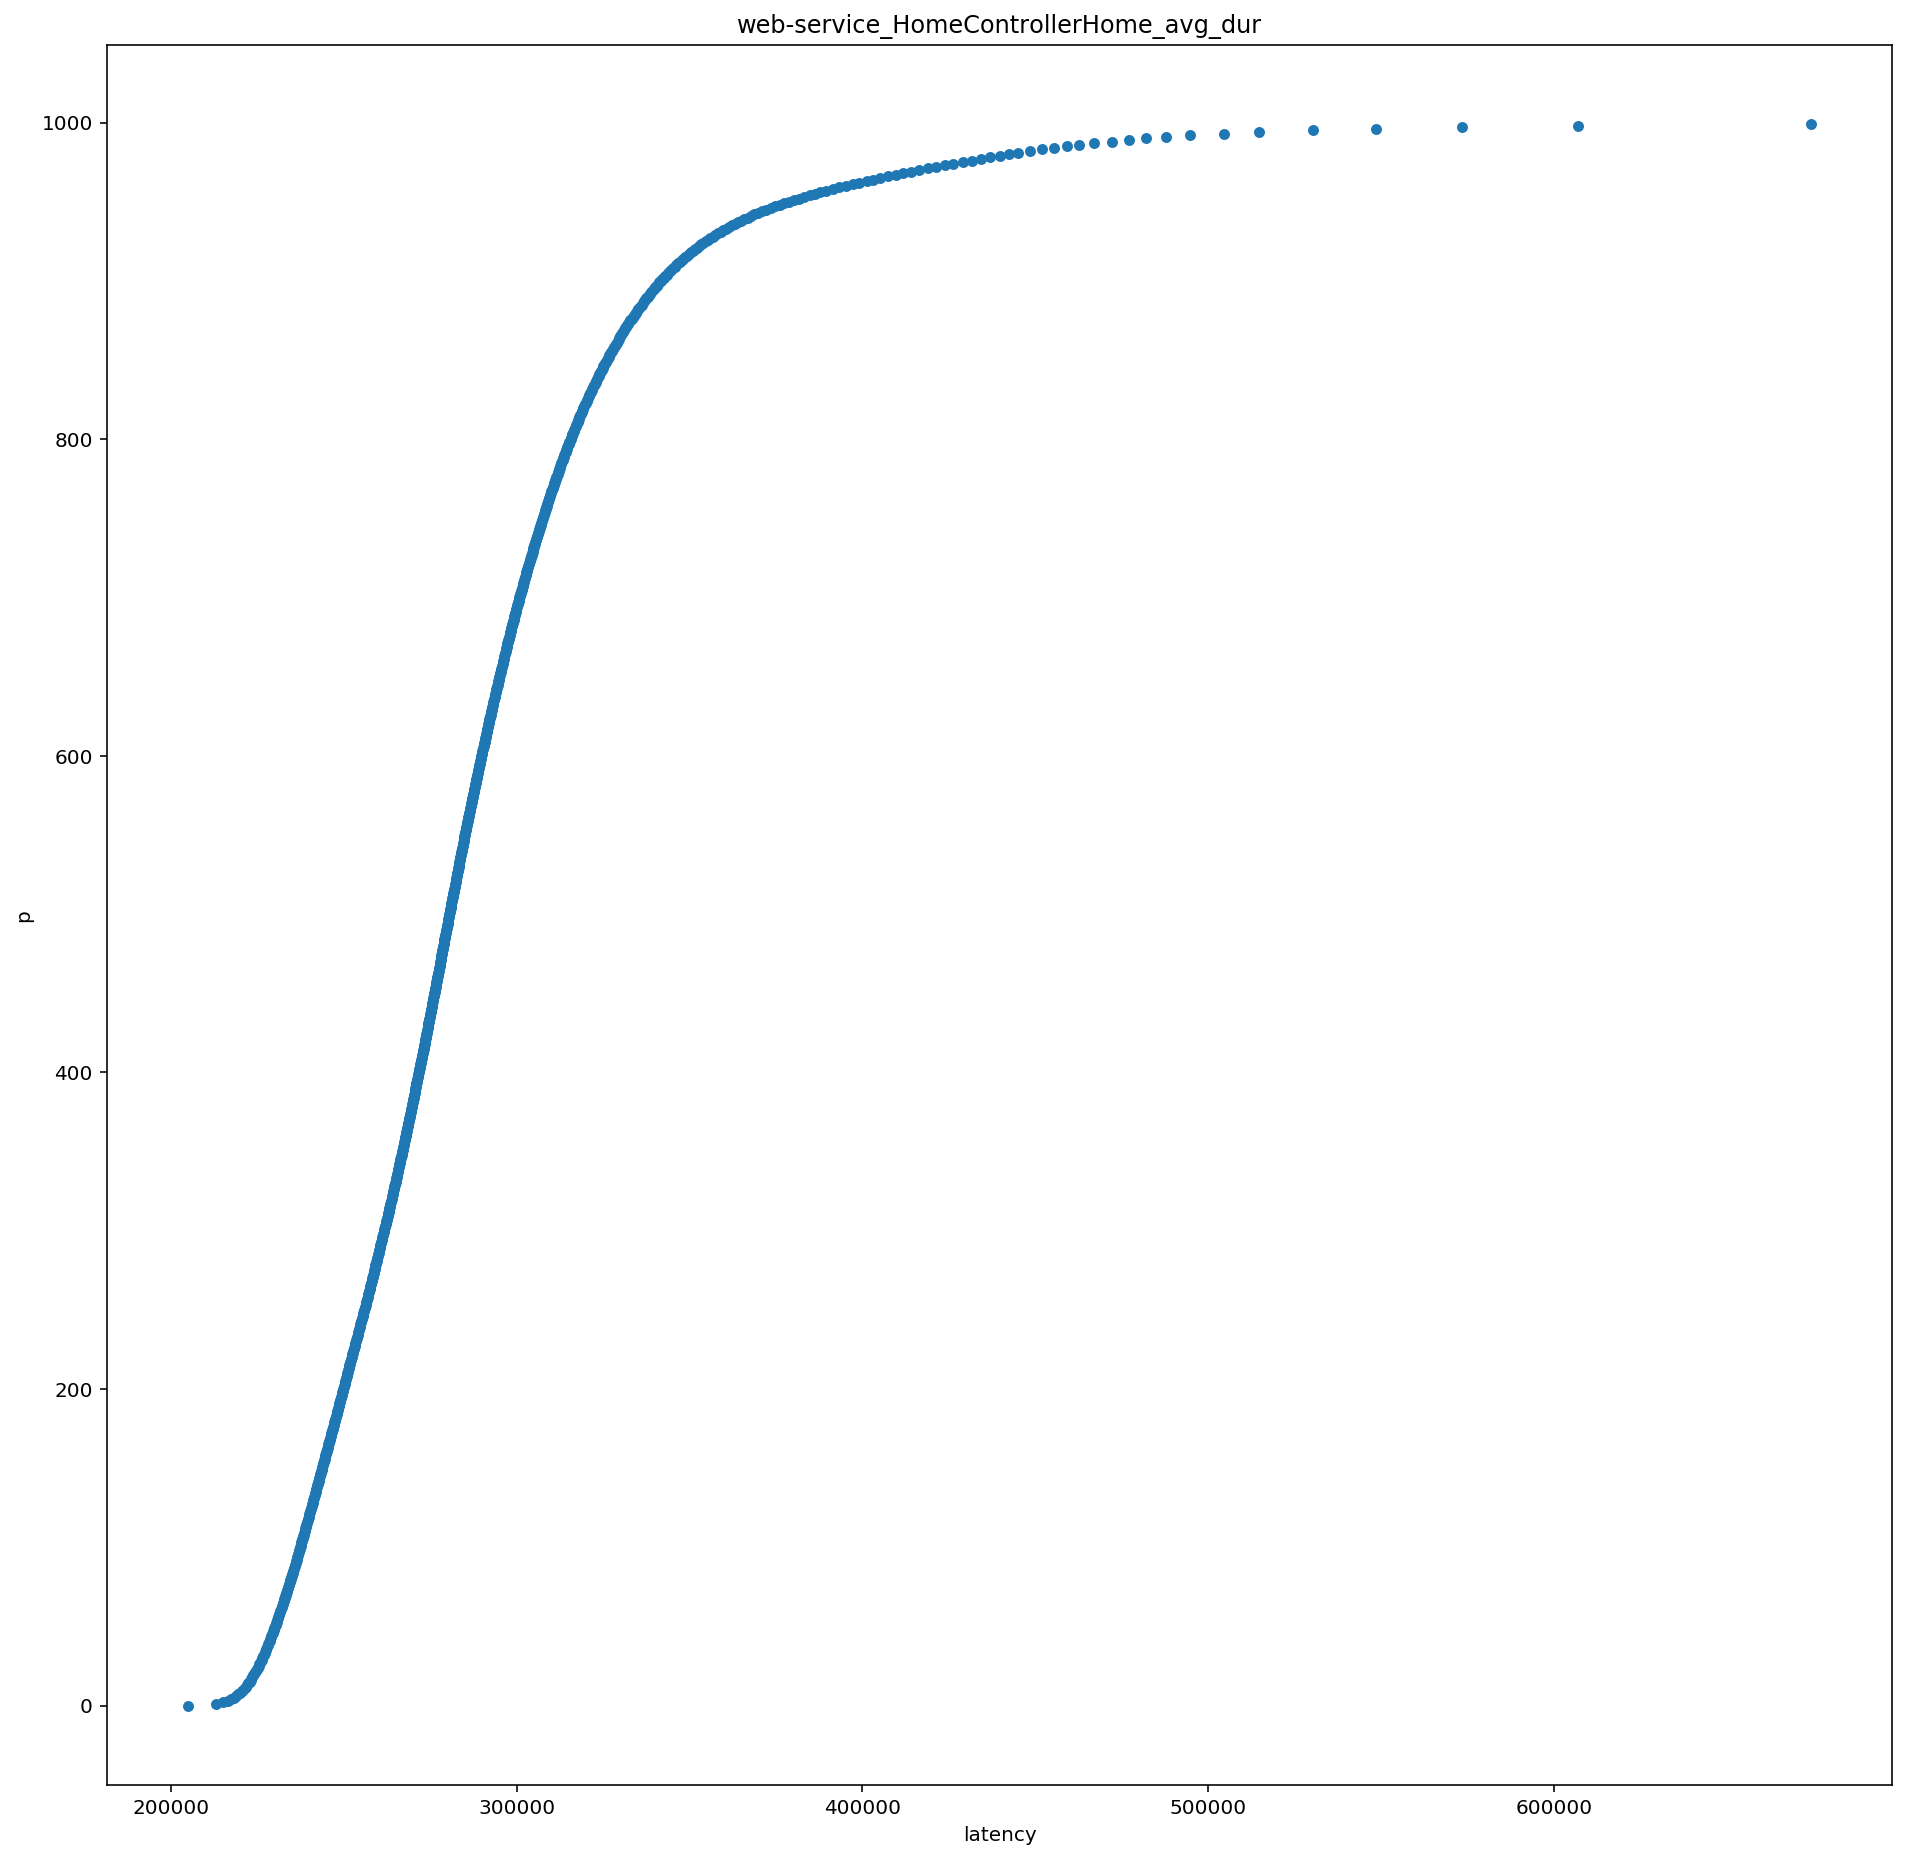

In [18]:
plt.rcParams['figure.figsize'] = (16,16)


(pandas.DataFrame(data={ 'p': range(1000), 'latency': quantiles[frontendName]})
      .plot.scatter(x='latency', y='p', title=frontendName));

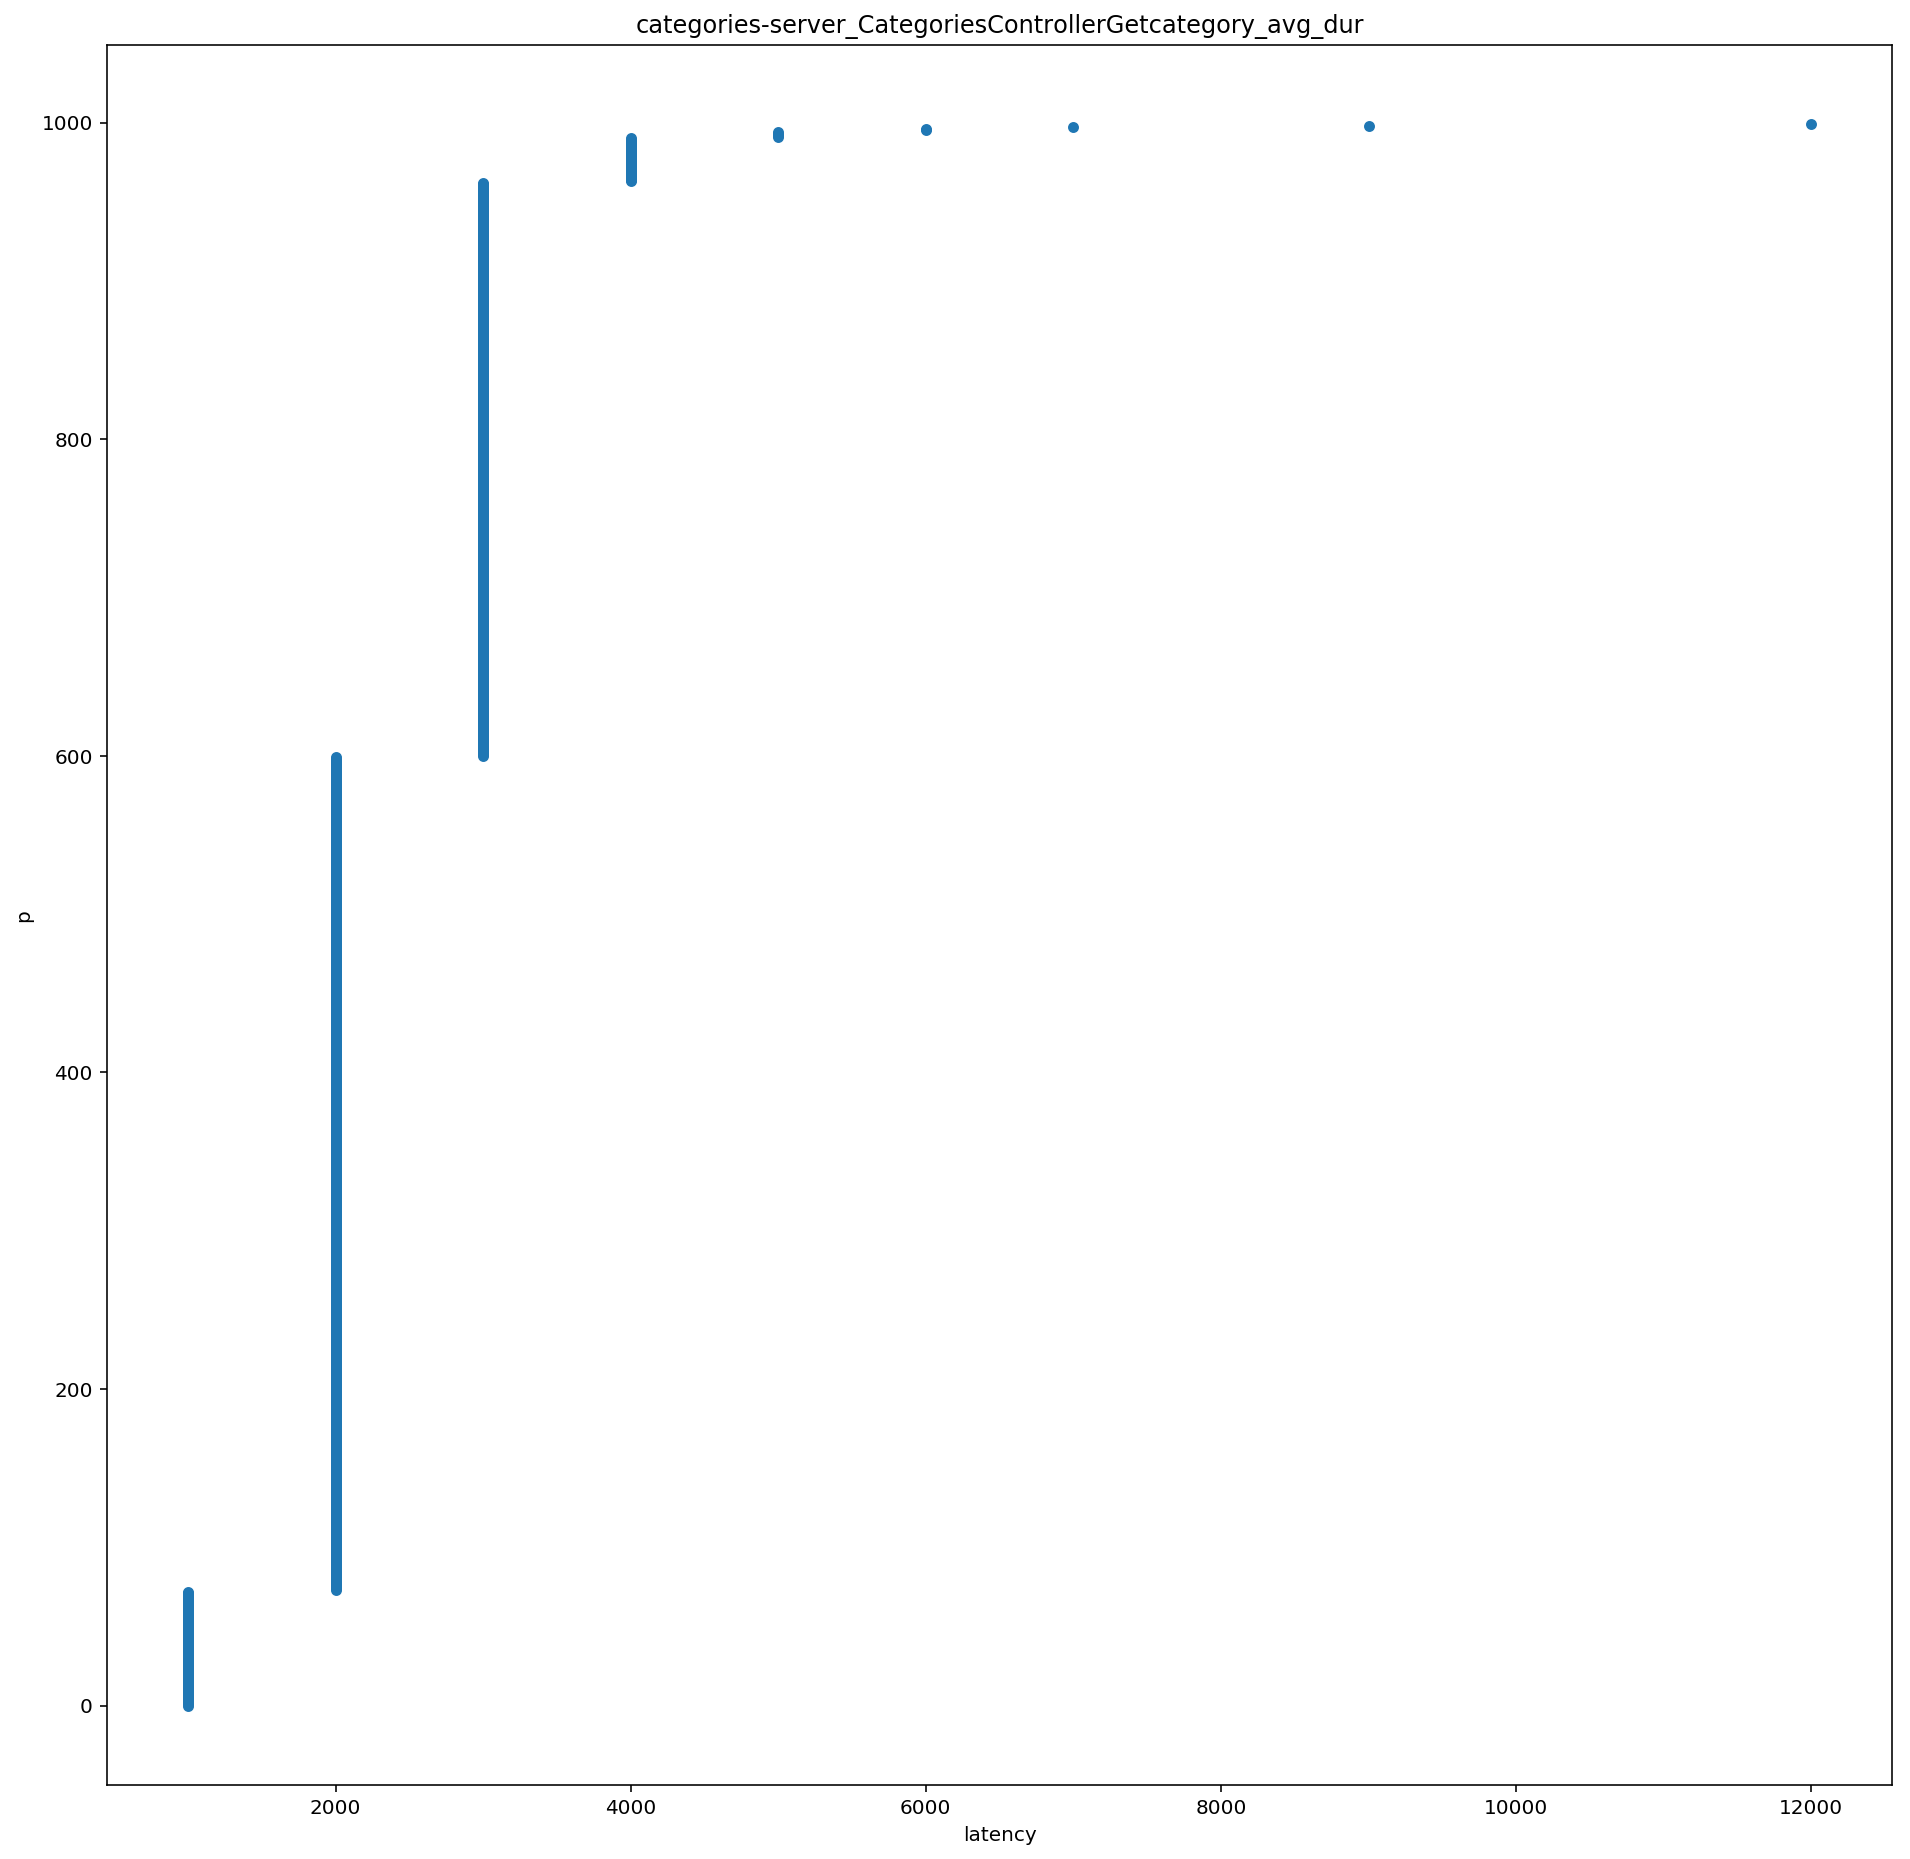

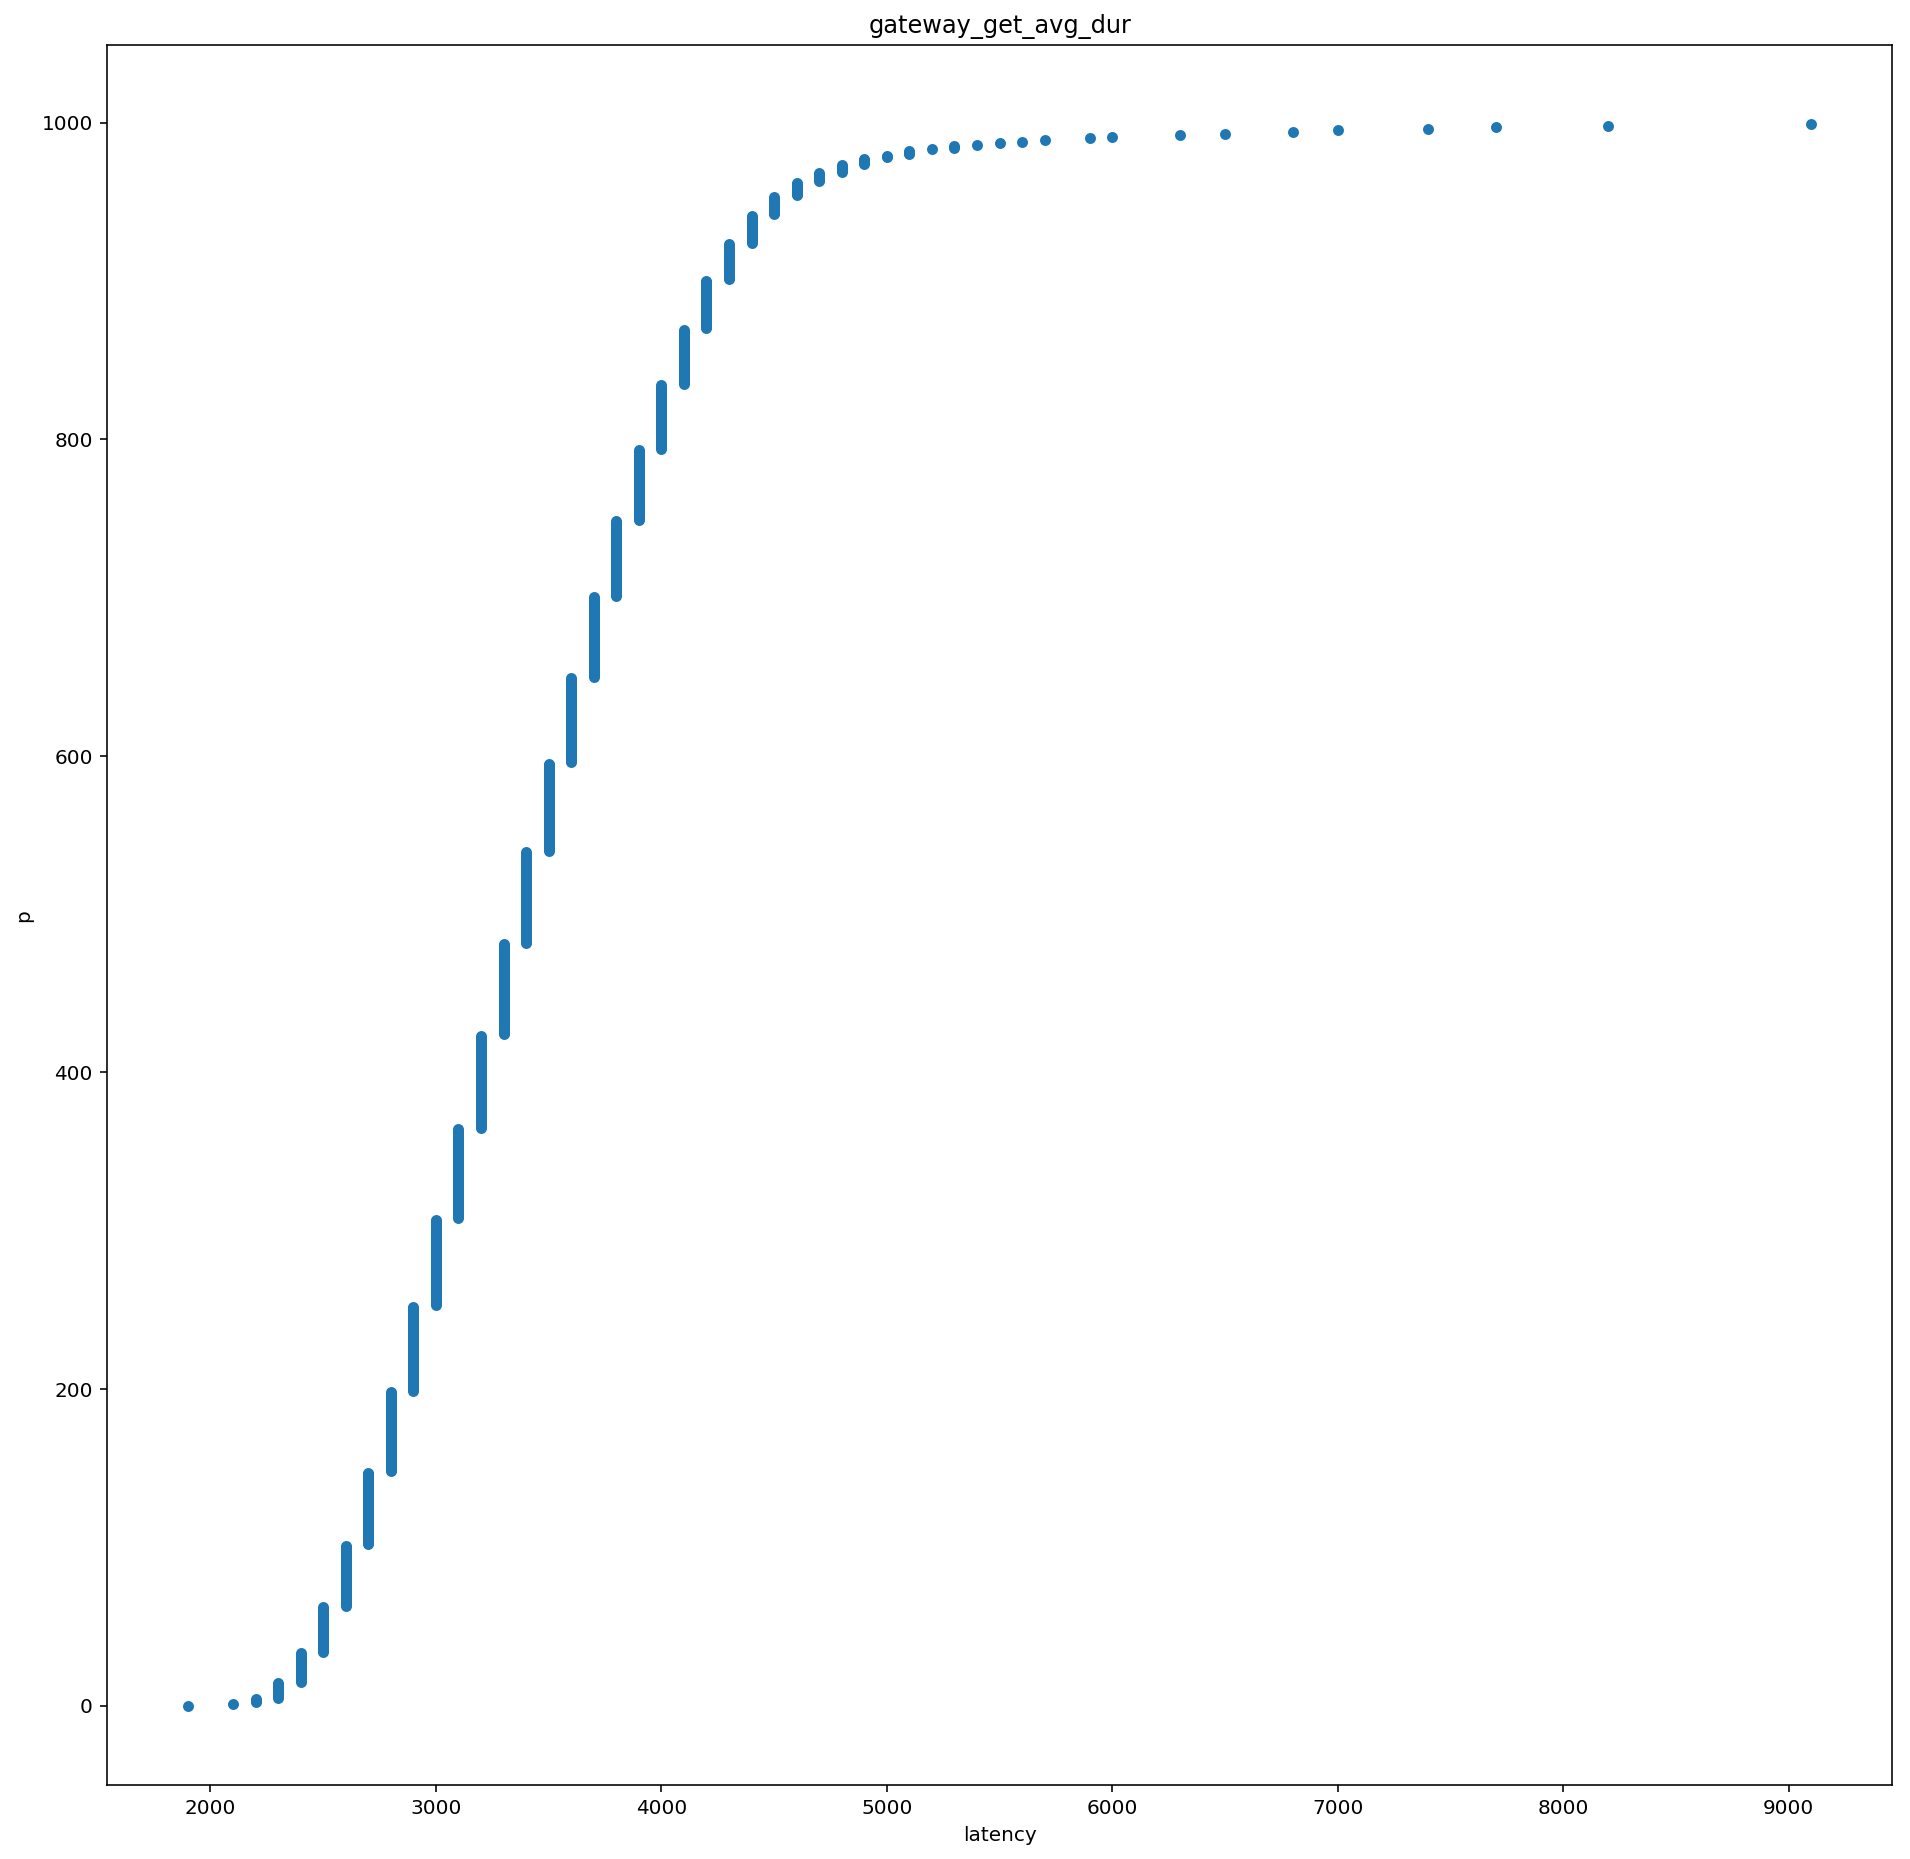

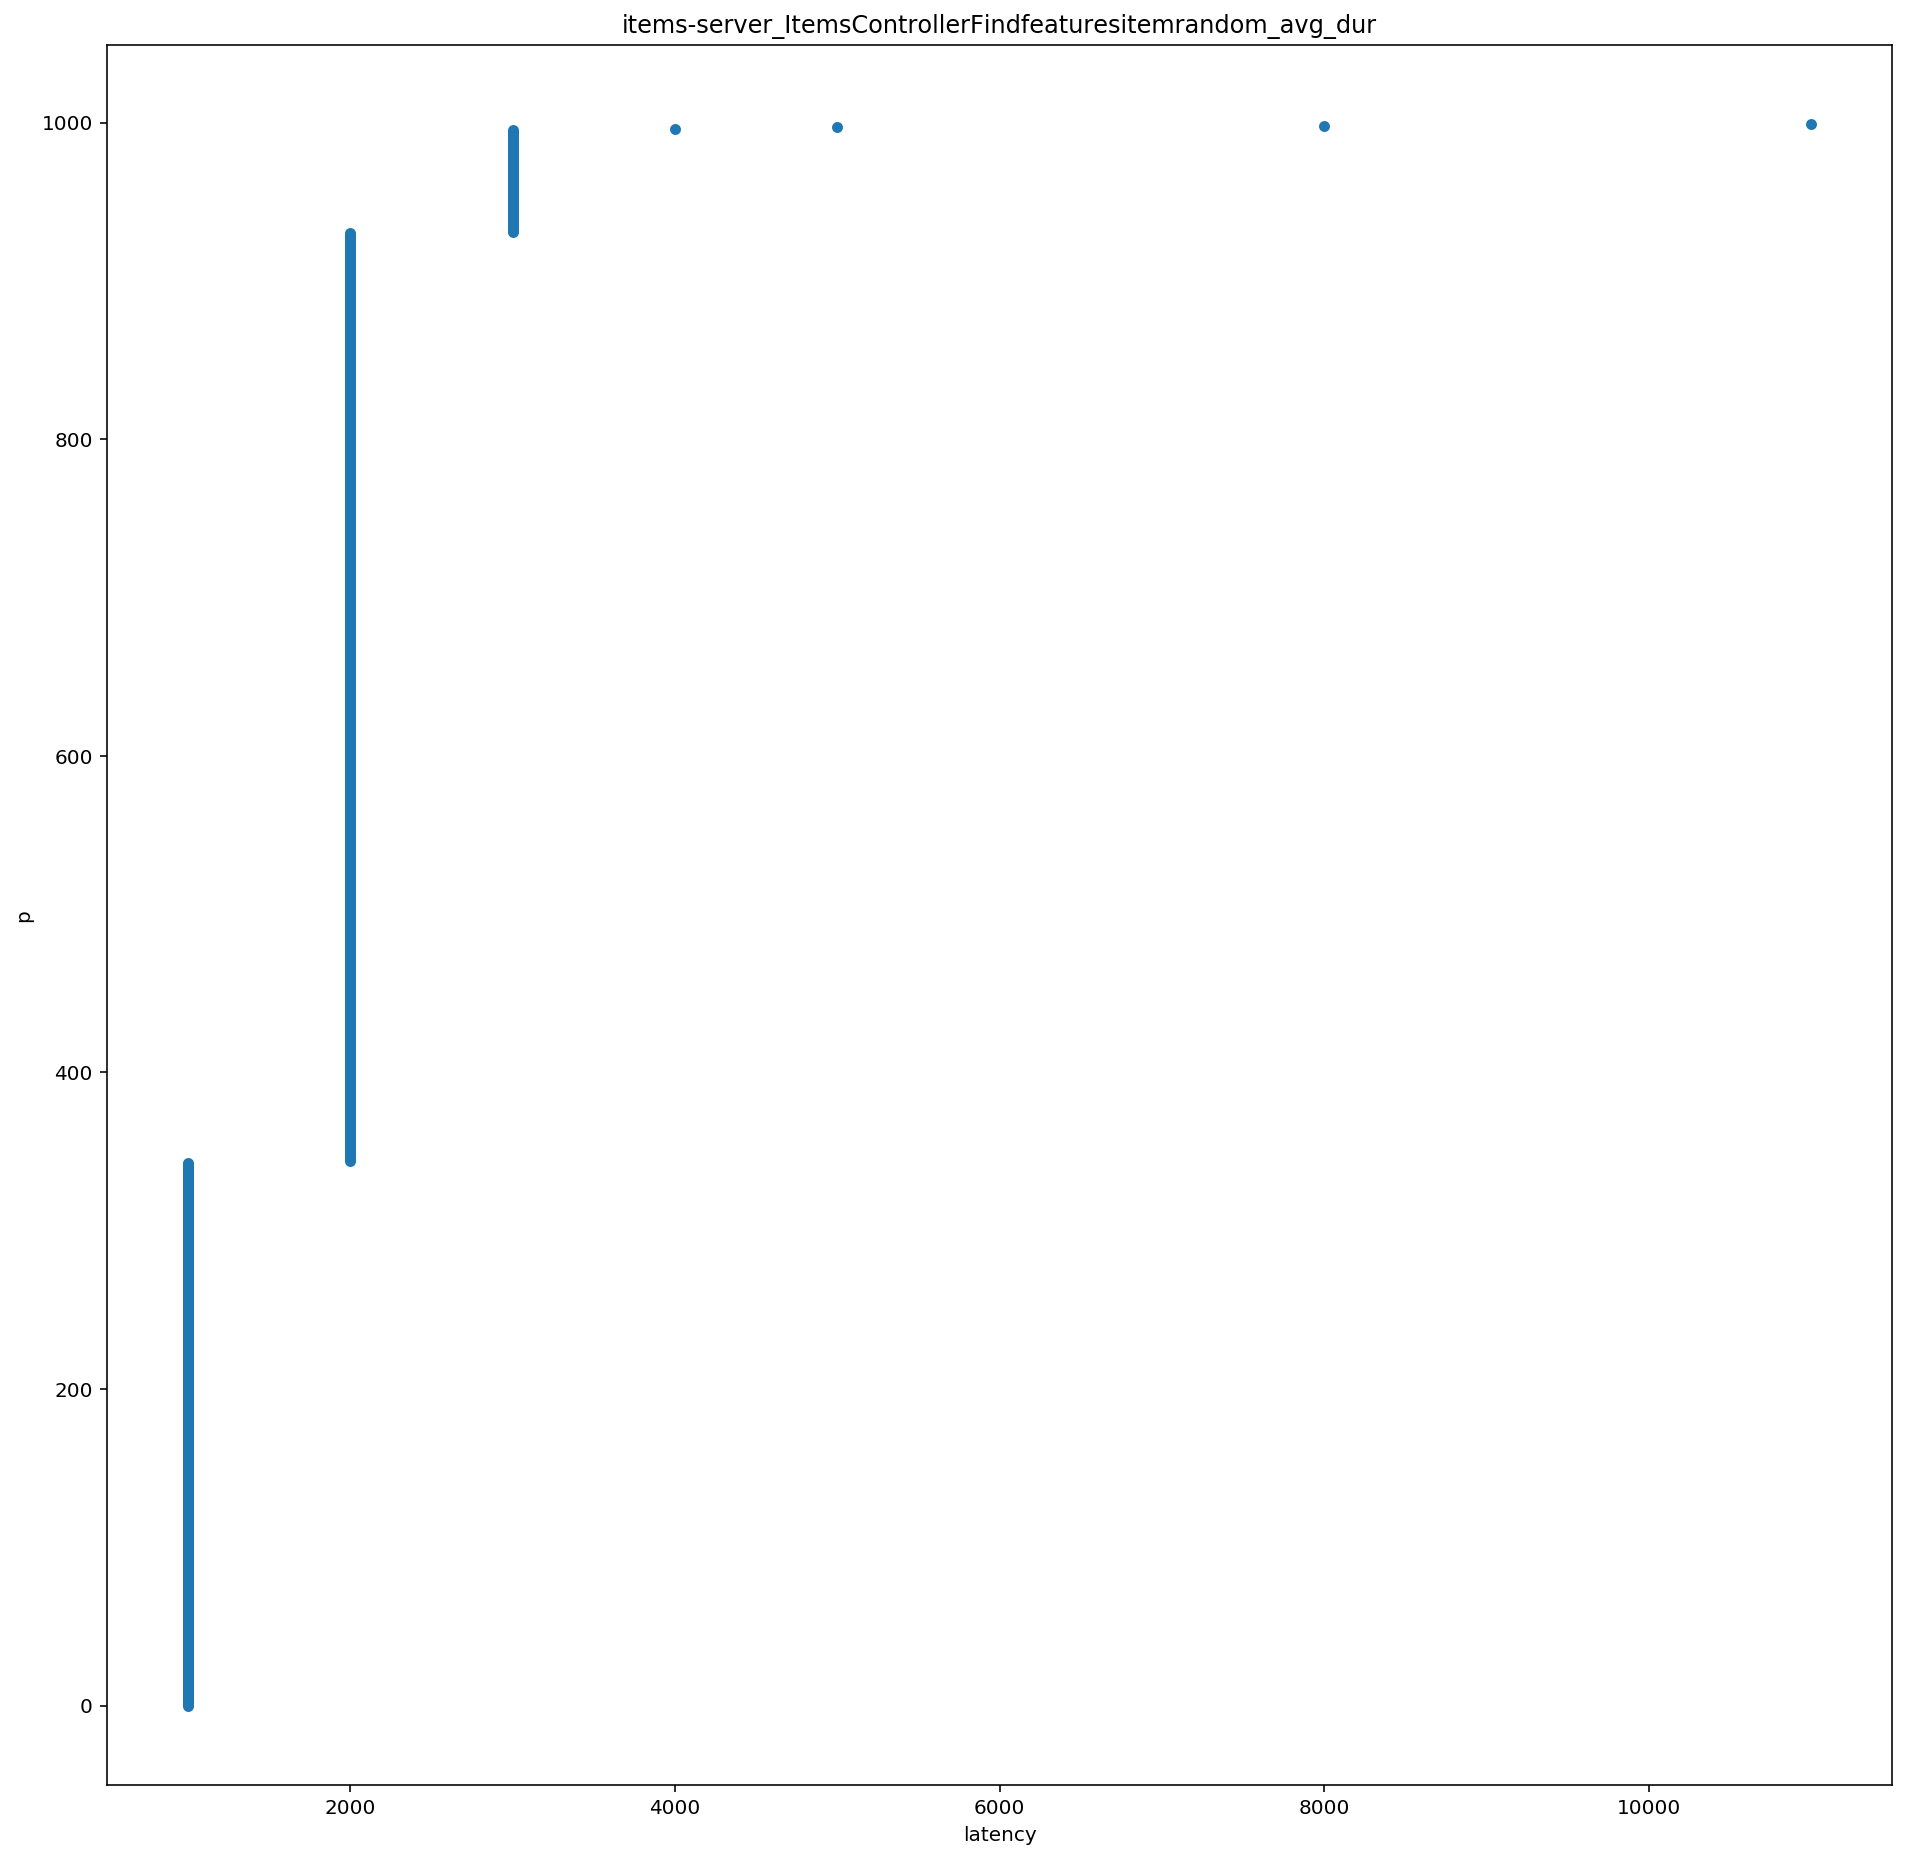

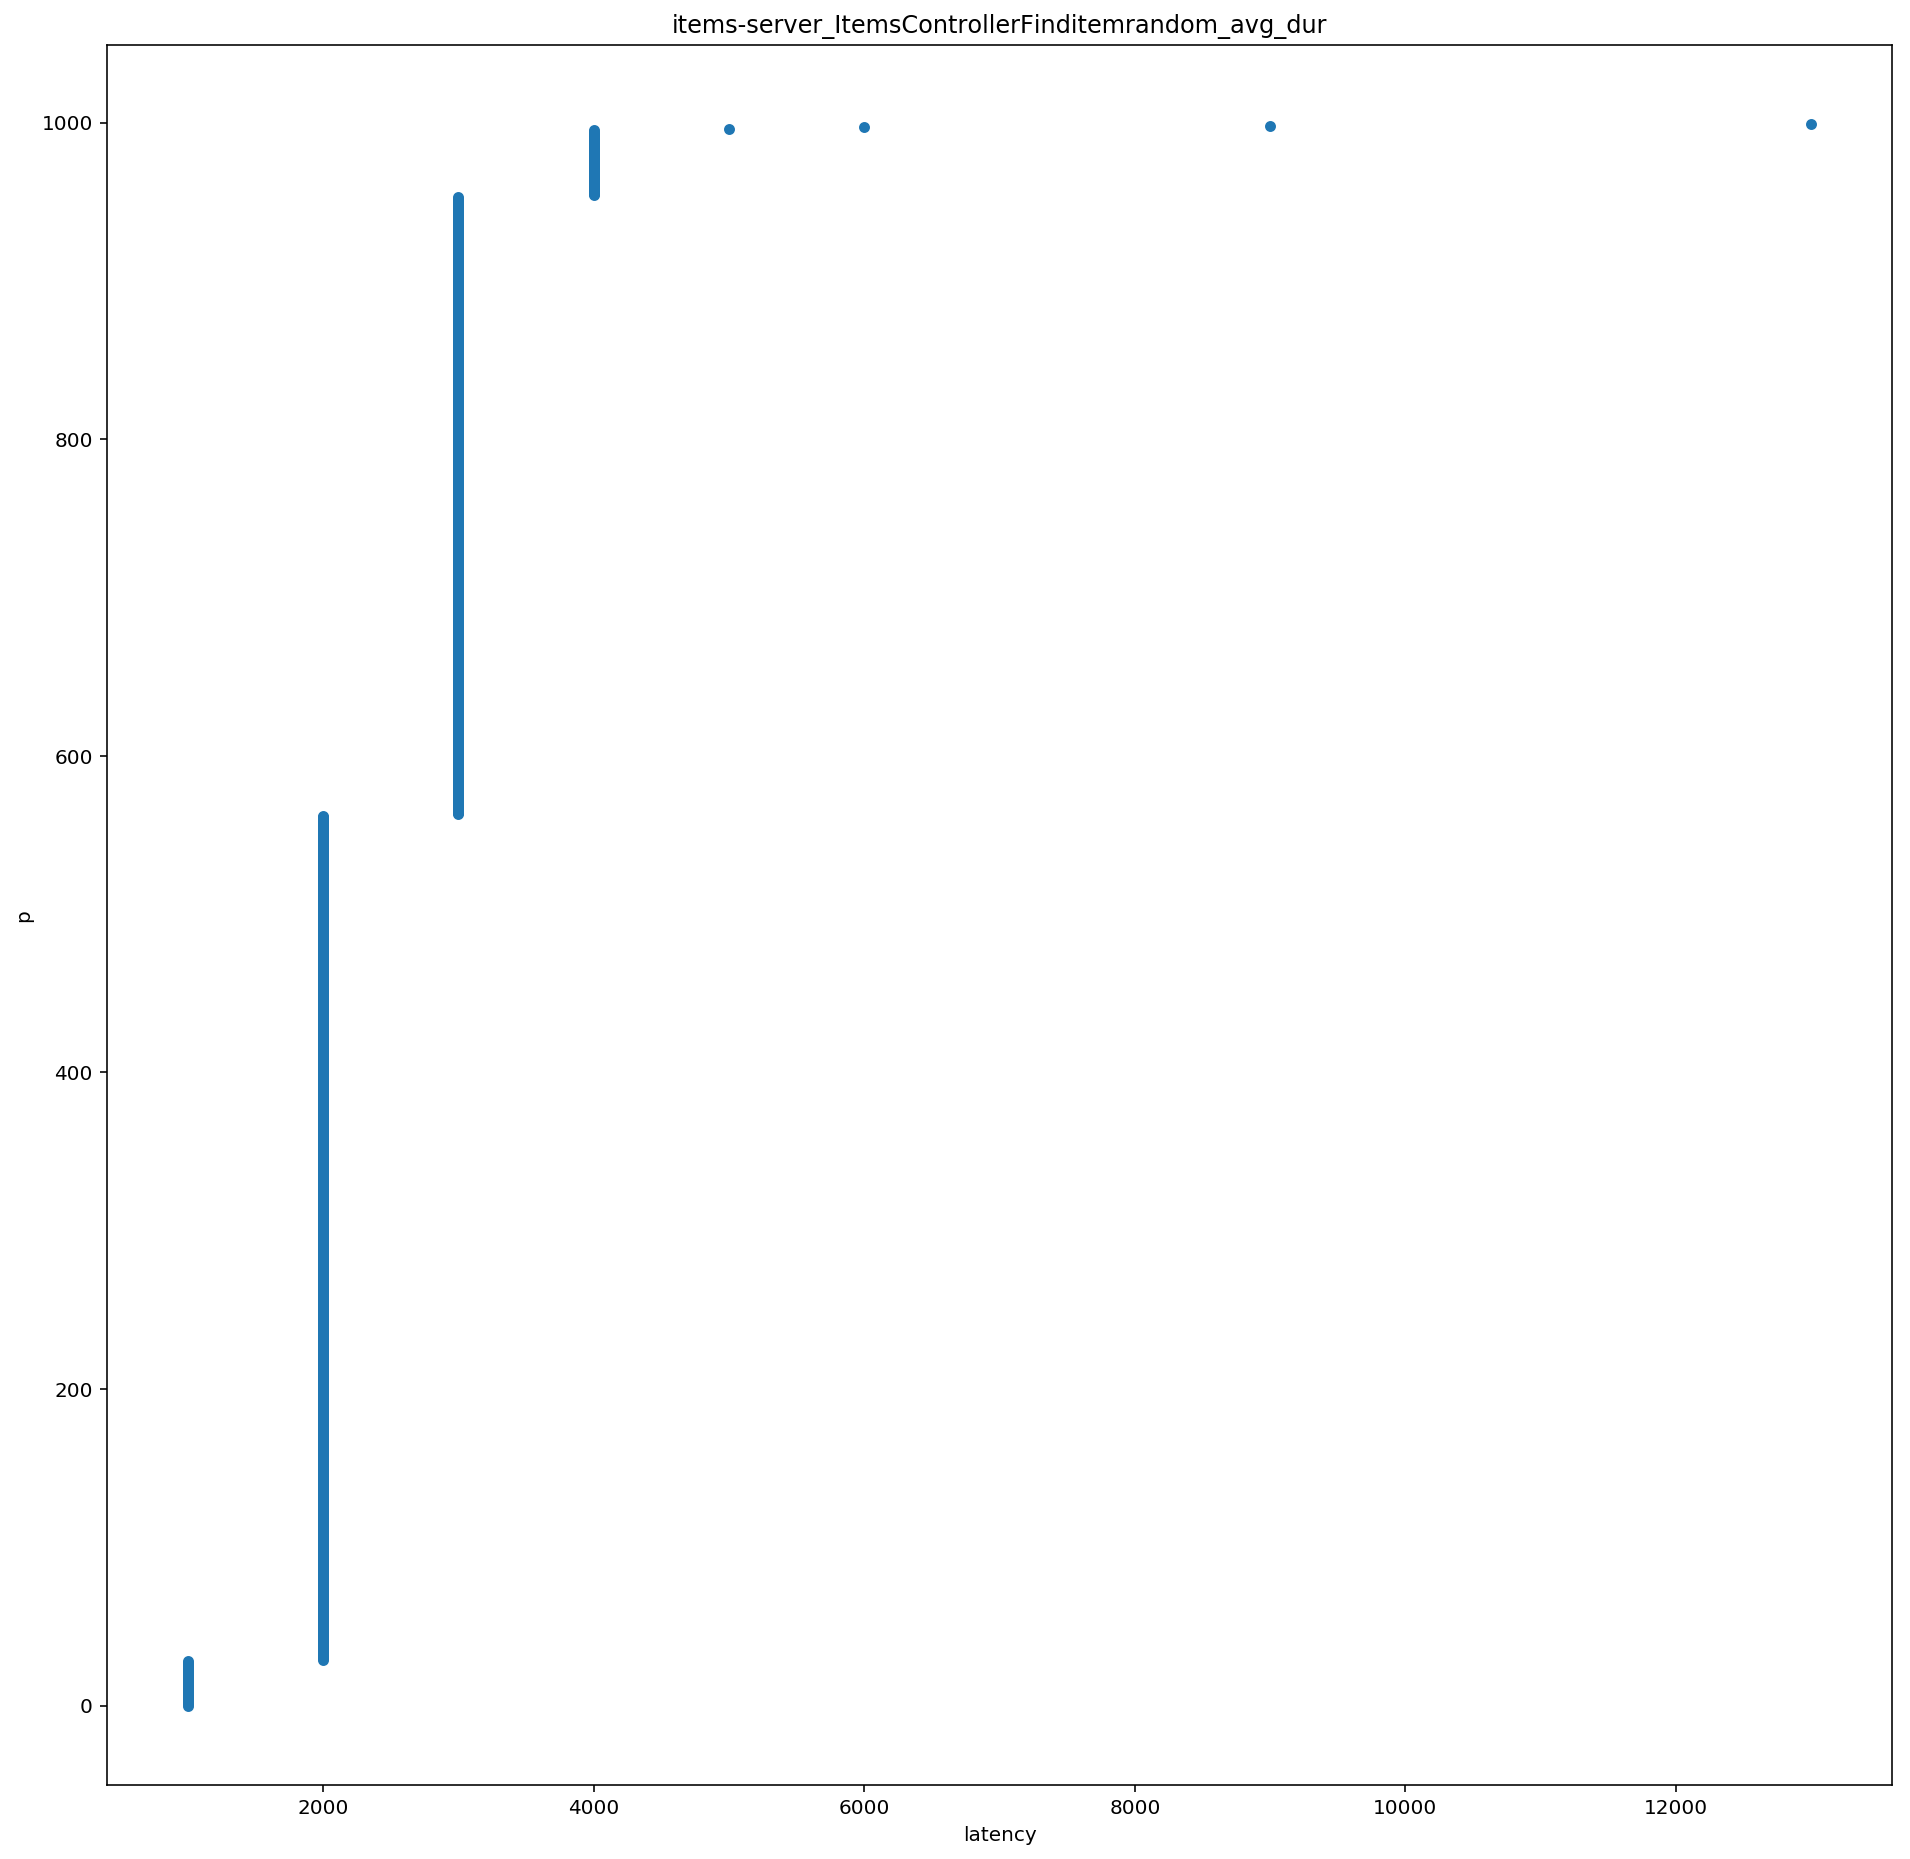

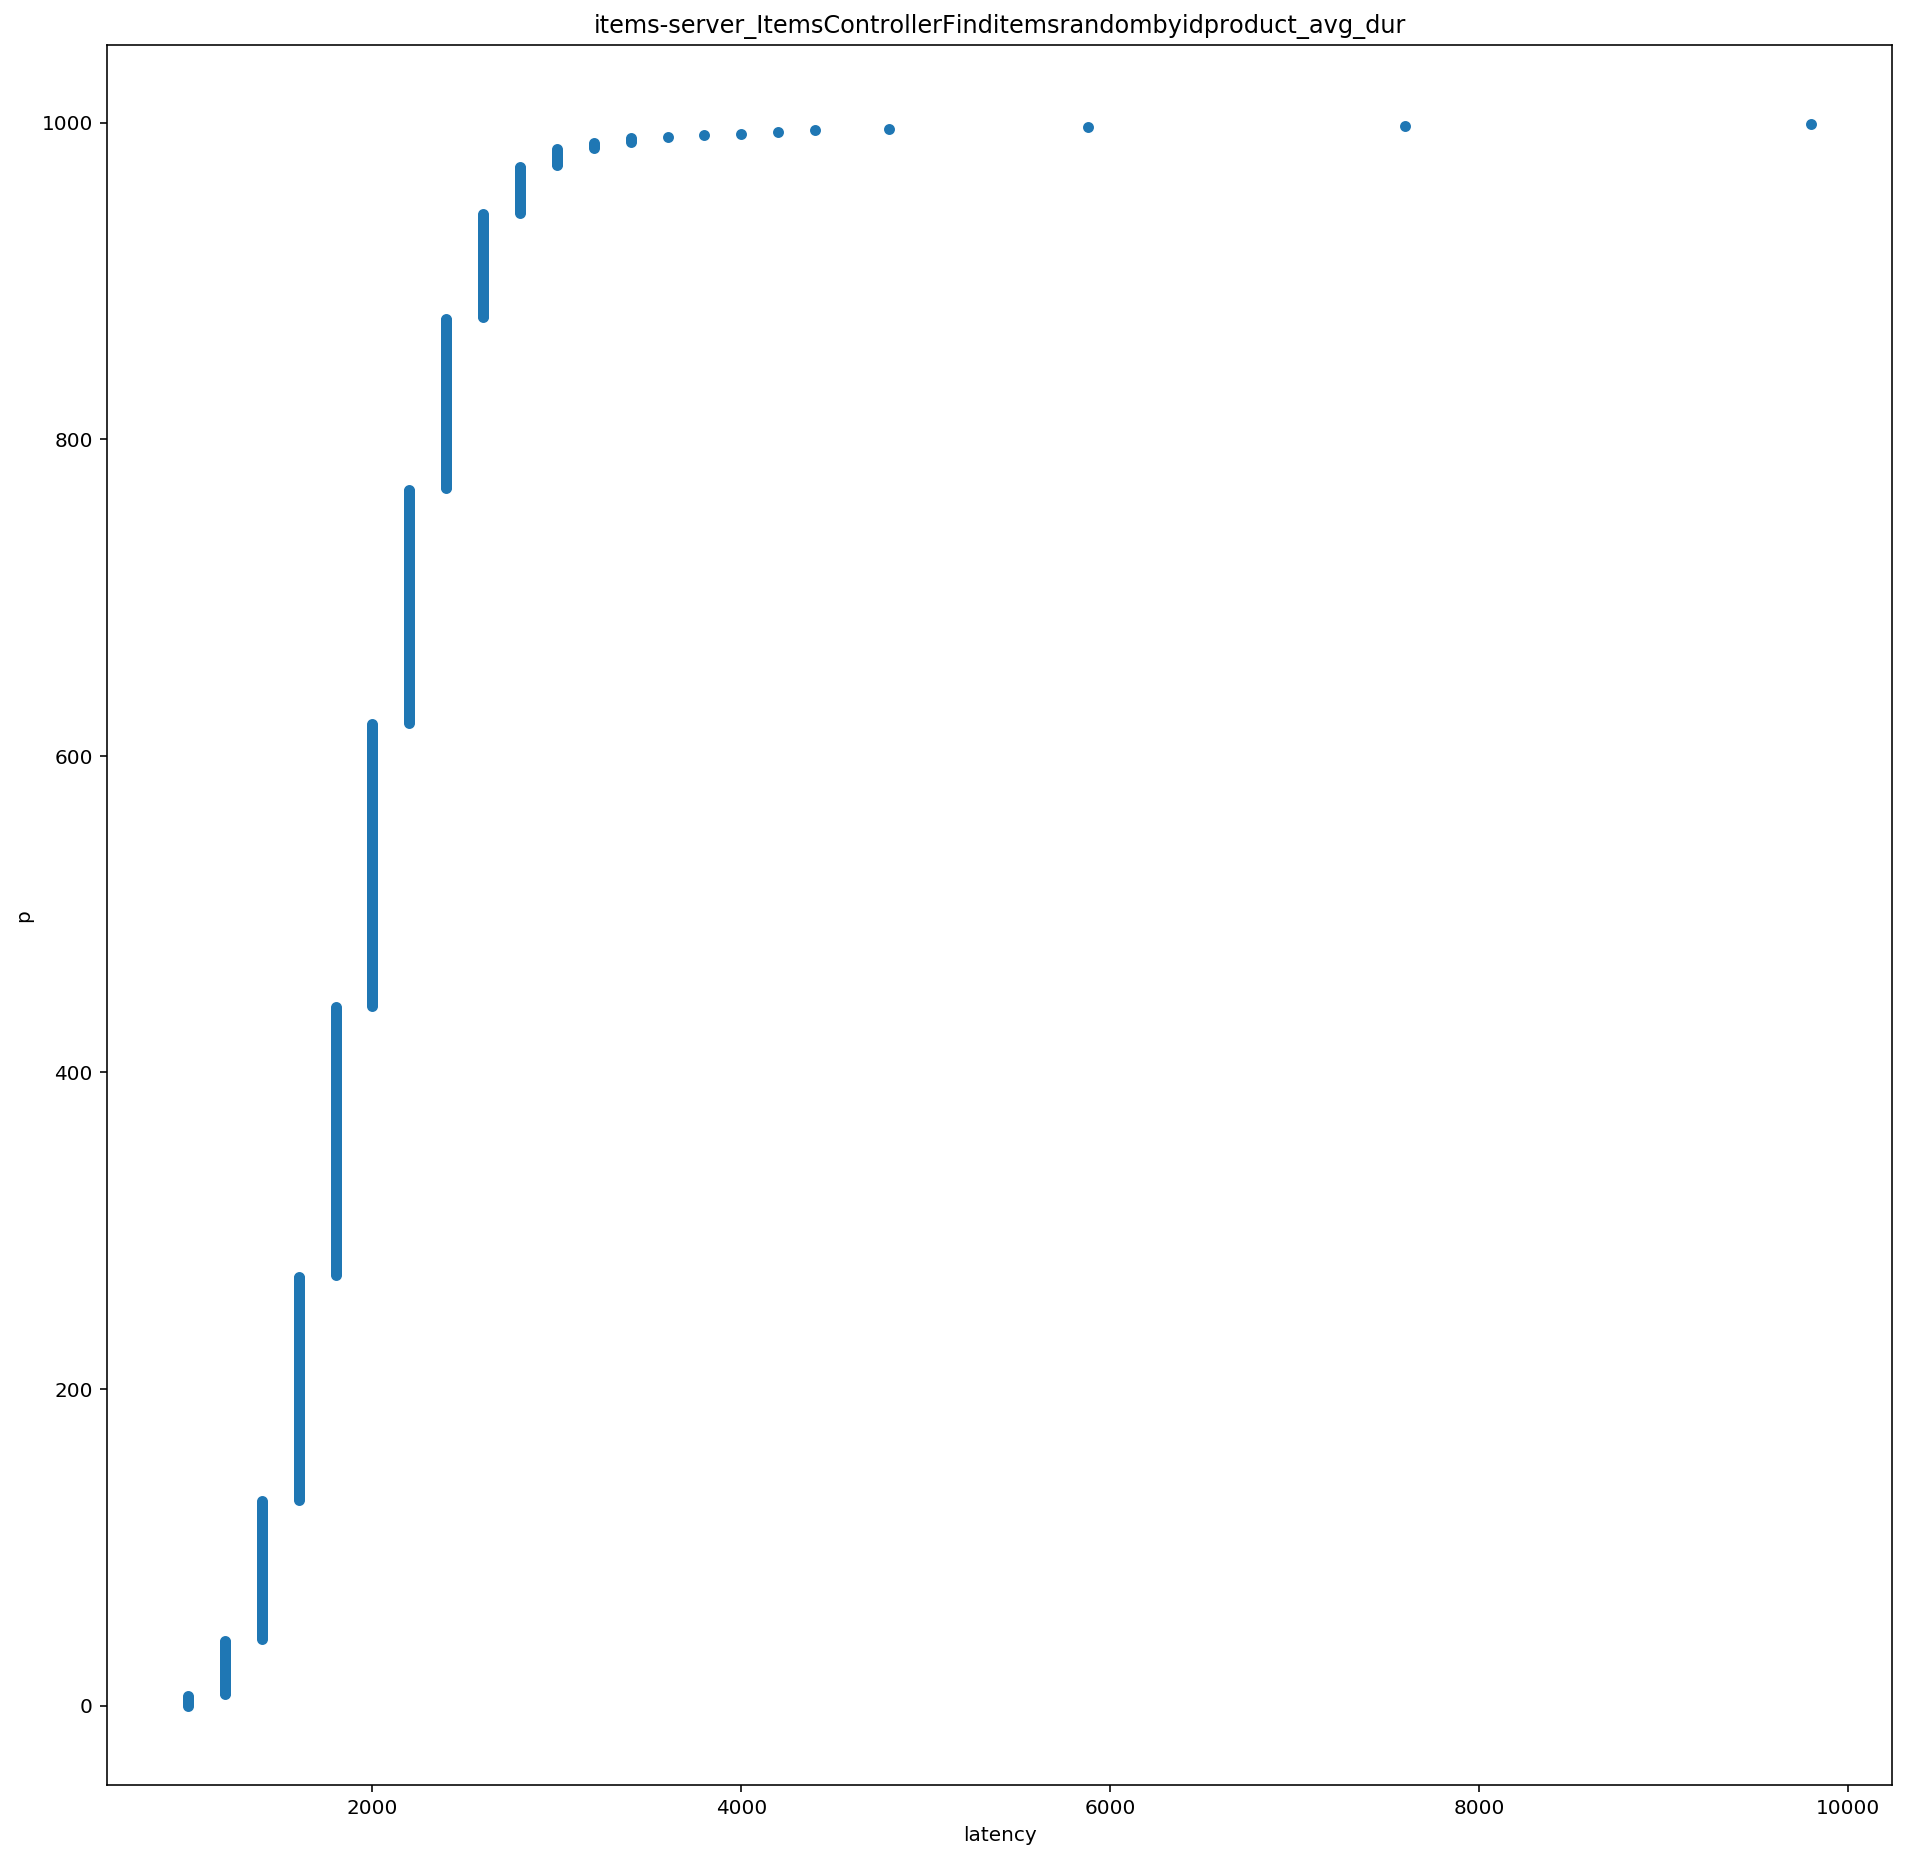

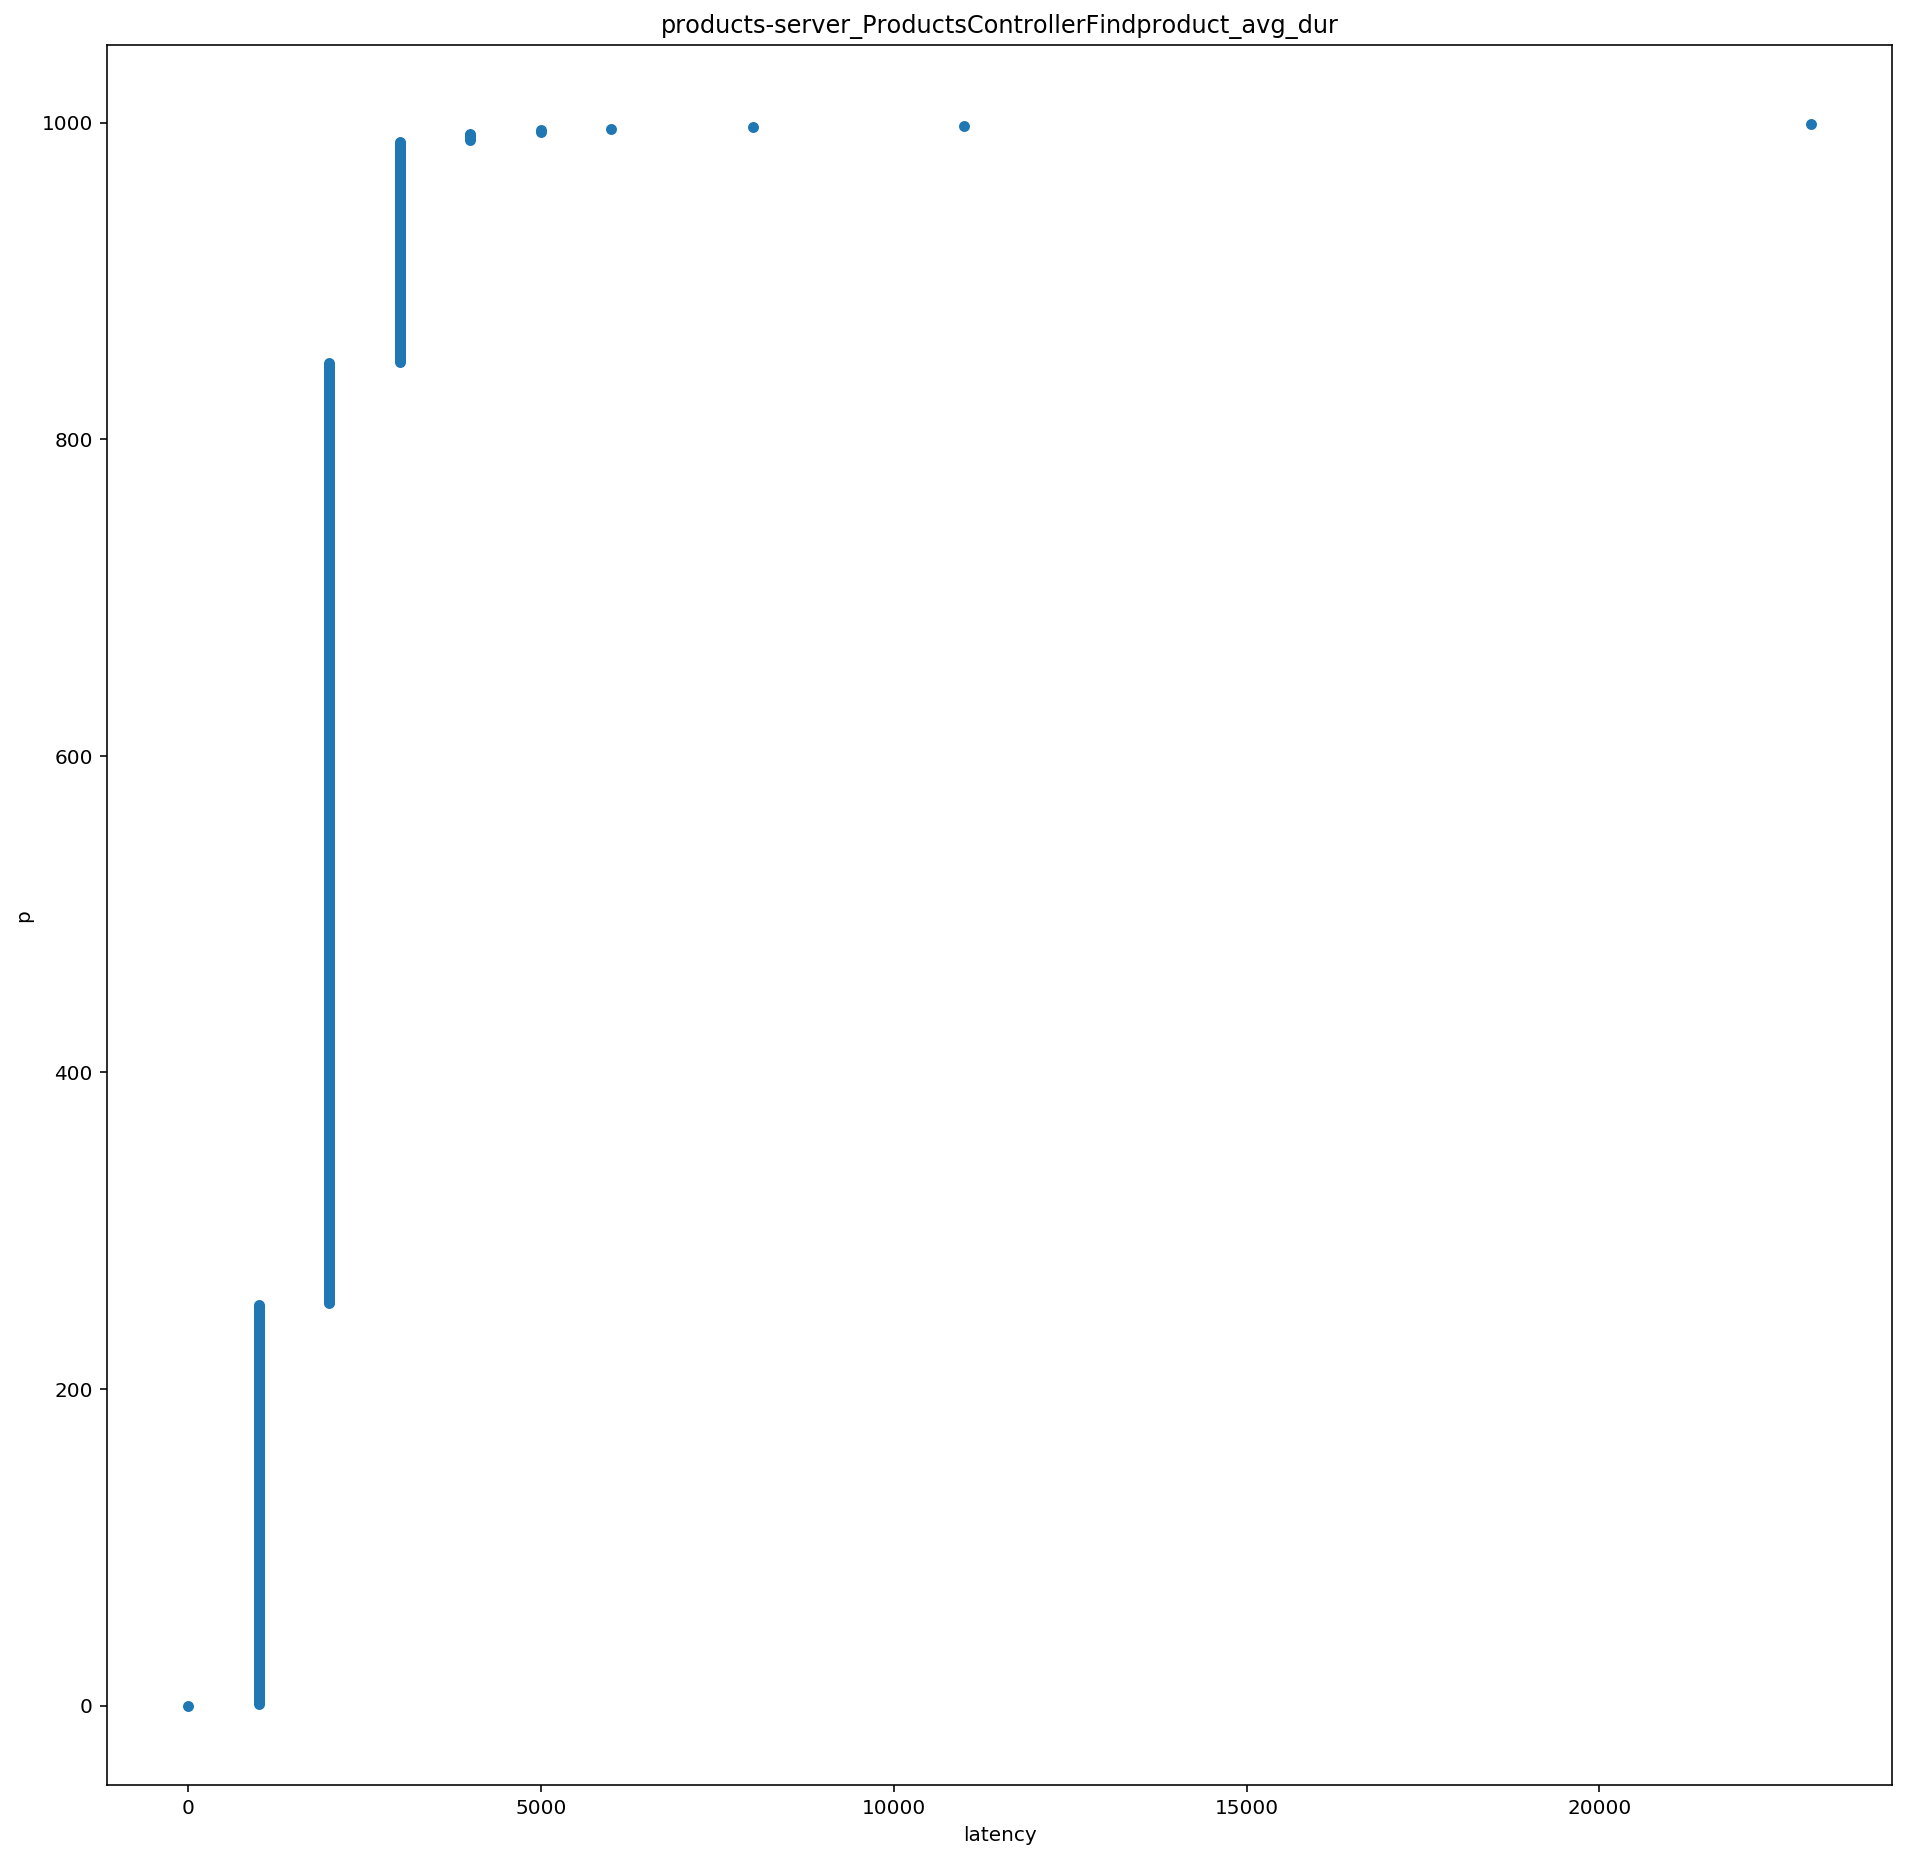

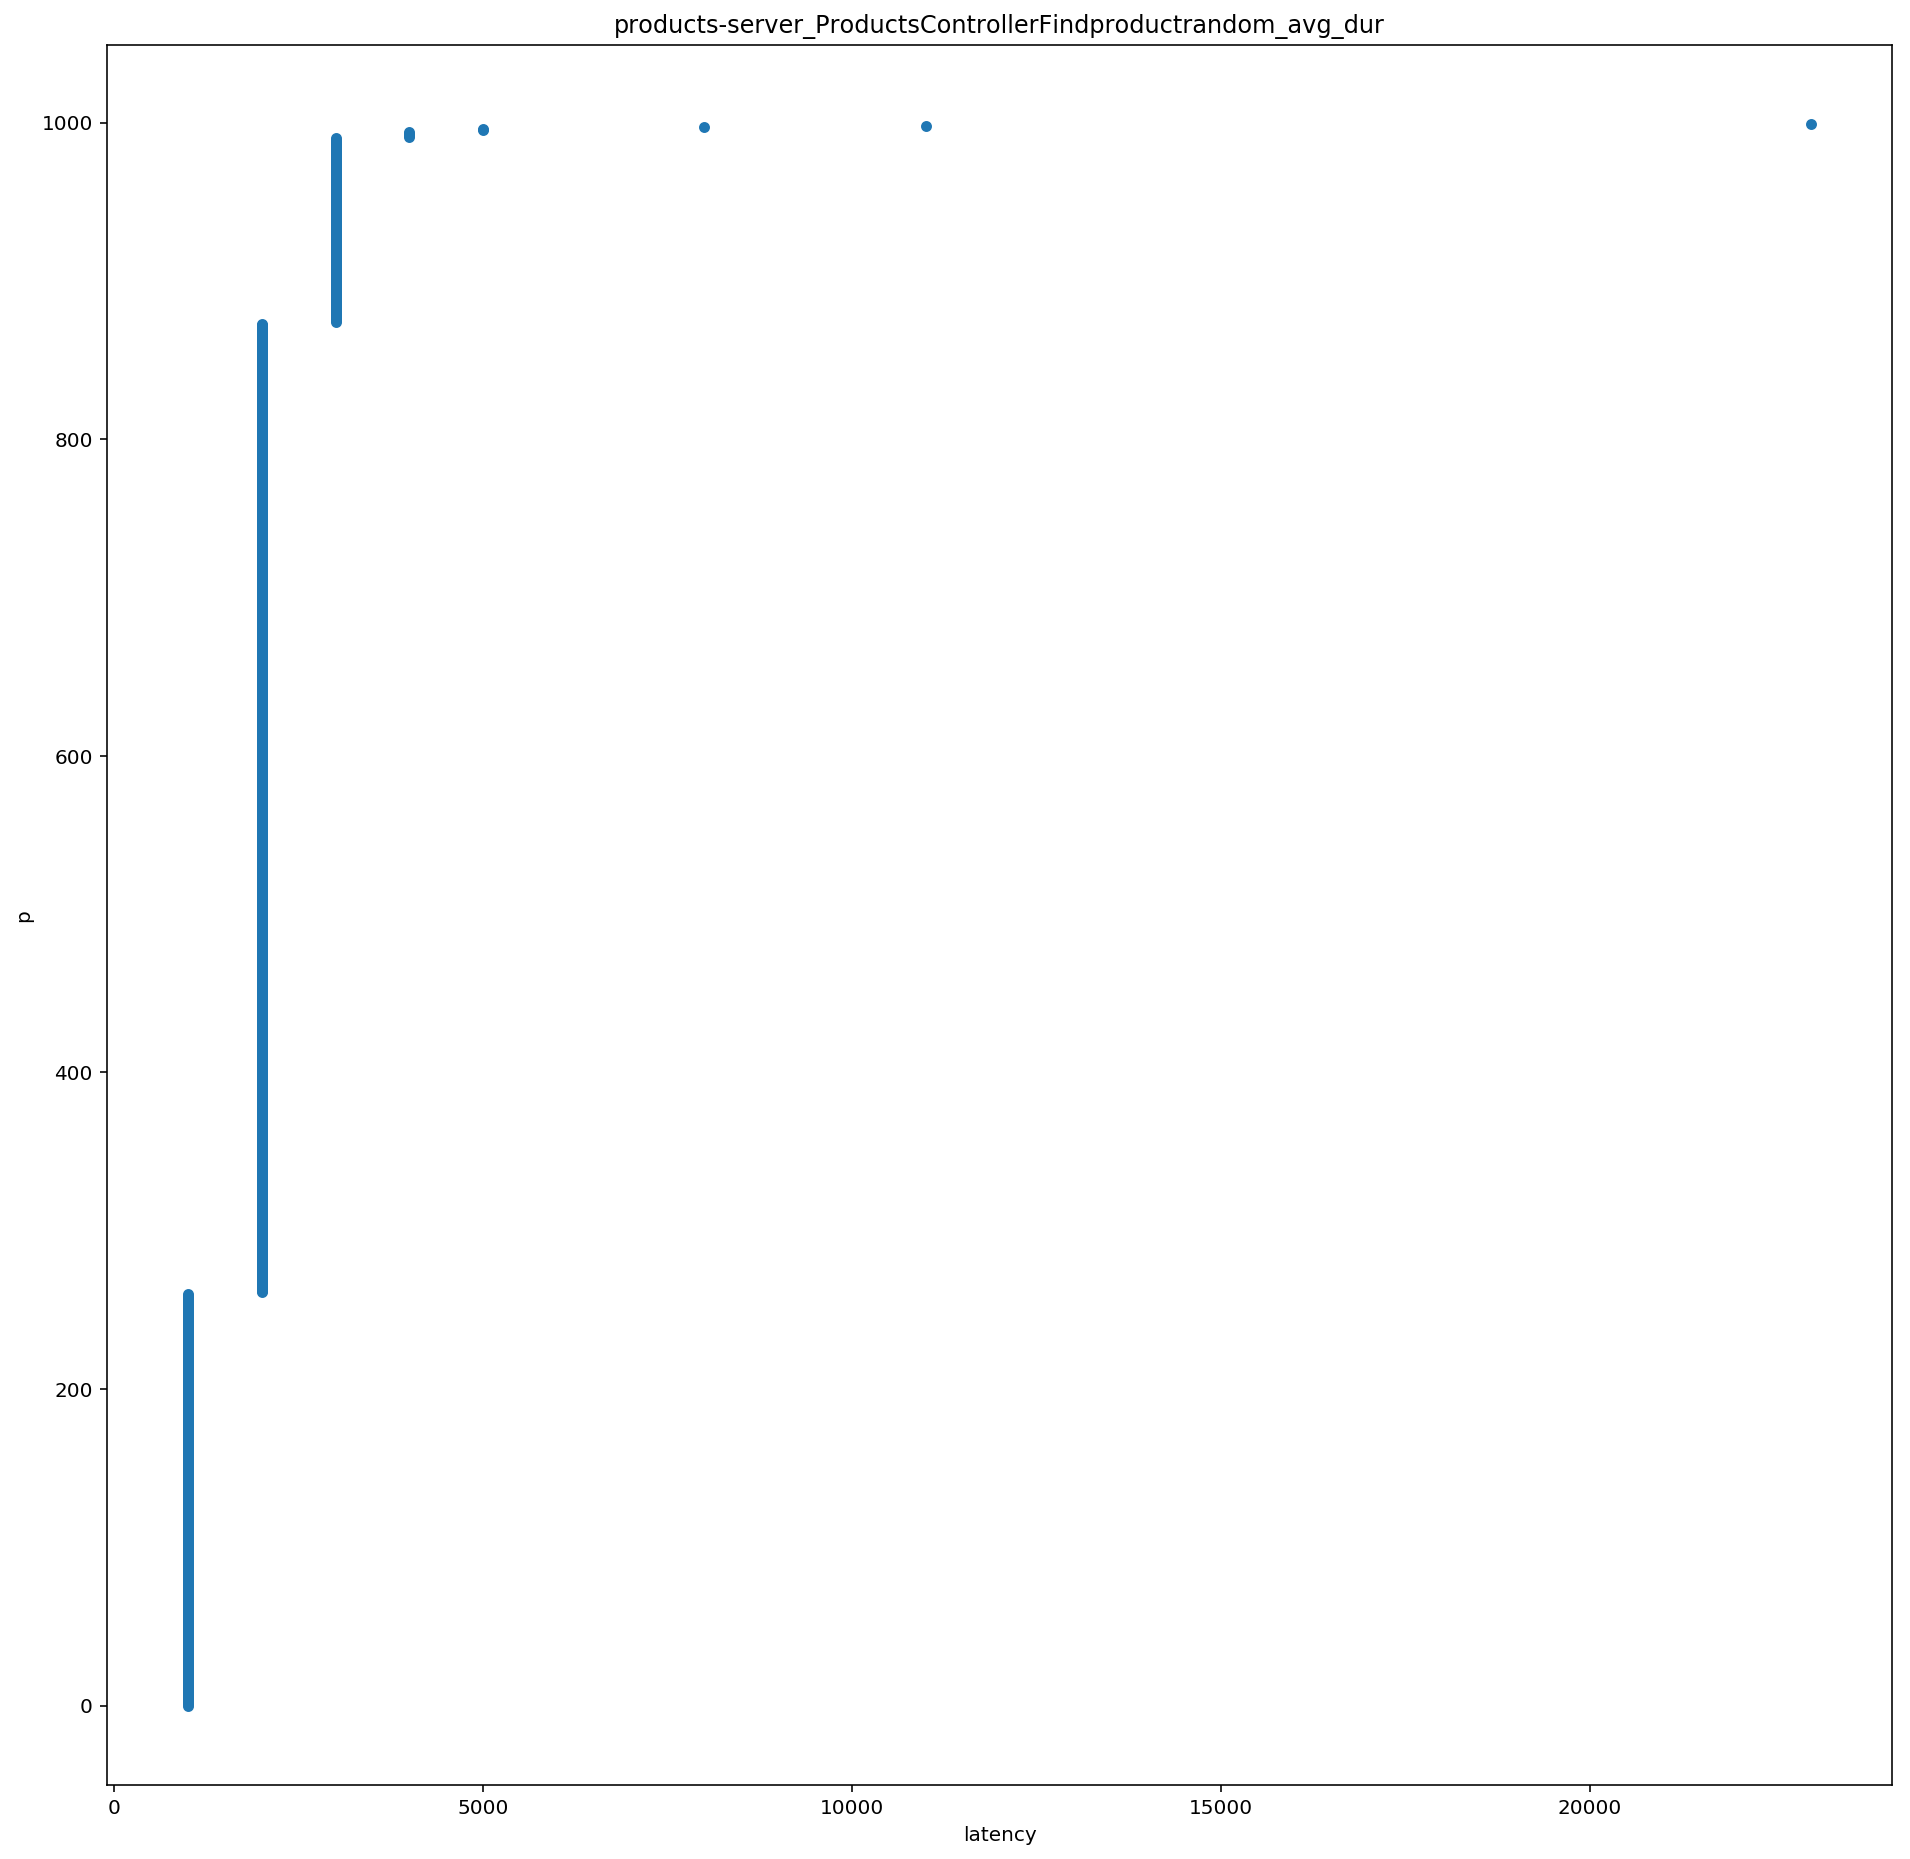

In [19]:
for e in backendNames:
    df = pandas.DataFrame(data={ 'p': range(1000), 'latency': quantiles[e]})
    df.plot.scatter(x='latency', y='p', title=e);